# Comparing linear and non-linear DR
Compare PCA and t-SNE methods by visualizing Bike Sharing Rental dataset. Explore how the different features are shown in the DR components. Build a simple prediction model (for example, MLP or Random Forest) to predict the count of total rental bikes and compare the performance of the model with the different DR techniques.

In [97]:
# Imports

import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Dataset
The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. Weather information are extracted from http://www.freemeteo.com.

In [98]:
# Load Bike Sharing Rental dataset

arff_path = 'dataset.arff'
data = arff.loadarff(arff_path)
df = pd.DataFrame(data[0])


#### Attributes:

- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :

   1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
   
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- count (target): count of total rental bikes including both casual and registered

In [99]:
# Preprocess data

X = df.drop(columns=['count', 'casual', 'registered'])
y = df['count']     # Removed 'casual', 'registered' because highly correlated with 'count'

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Matematical methods
In this implementation, Principal Component Analysis (PCA) and t-distributed stochastic neighbor (t-SNE) are computed for comparison in handling dimensionality reduction.

### Principal Component Analysis (PCA)

In [100]:
def evaluate_model(X_data, y_data, name):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}\n- R²:\t{r2_score(y_test, y_pred):.3f}\n- RMSE:\t{np.sqrt(mean_squared_error(y_test, y_pred)):.3f}\n")
    
evaluate_model(X_scaled, y, "Original dataset")


Original dataset
- R²:	0.944
- RMSE:	41.991



PCA - 2 components
- R²:	0.193
- RMSE:	159.809



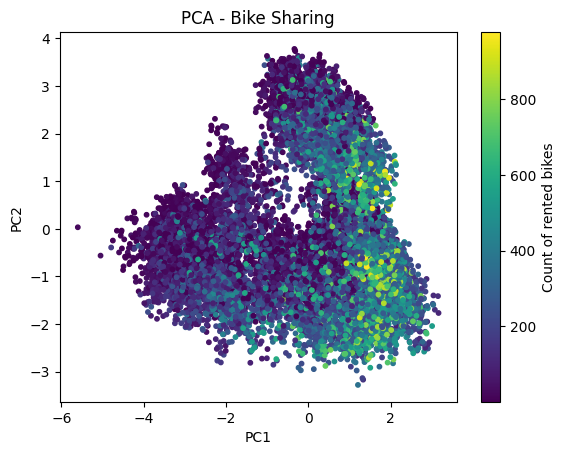

PCA on Bike rental dataset - 2 components


PCA - 8 components
- R²:	0.562
- RMSE:	117.829



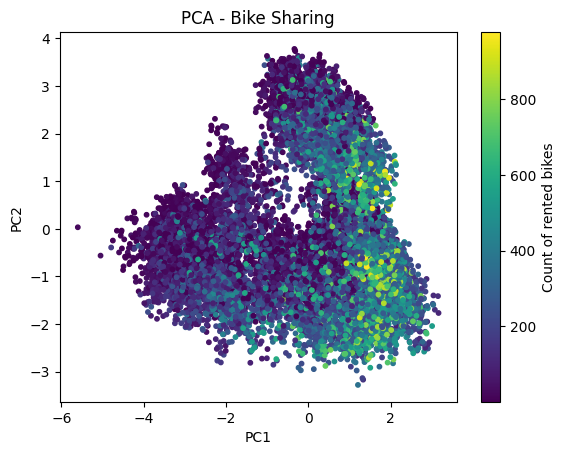

PCA on Bike rental dataset - 8 components


In [103]:
# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

evaluate_model(X_pca, y, "PCA - 2 components")

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=10)
plt.title('PCA - Bike Sharing')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Count of rented bikes')
plt.show()
print("PCA on Bike rental dataset - 2 components\n\n")

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

evaluate_model(X_pca, y, "PCA - 8 components")

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=10)
plt.title('PCA - Bike Sharing')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Count of rented bikes')
plt.show()
print("PCA on Bike rental dataset - 8 components")

<br>
<br>
As the metrics show, with only 2 Principal Components (PCs) considered, R<sup>2</sup> is low (R<sup>2</sup> = 0.193), meaning few variance is explained using PCA. This makes sense, since the number of rented bikes most definitely have a non-linear correlation with most features, and with PCA being a linear method, there is a considerable loss of information to take into account.
We need to consider 8 PCs to have a good portion of variance explained (R<sup>2</sup> = 0.562).

### t-distributed stochastic neighbor (t-SNE)

t-SNE (Euclidean)
- R²:	0.588
- RMSE:	114.287

t-SNE (Cosine)
- R²:	0.566
- RMSE:	117.269

t-SNE (Mahalanobis)
- R²:	0.562
- RMSE:	117.725

t-SNE (Chebychev)
- R²:	0.600
- RMSE:	112.597



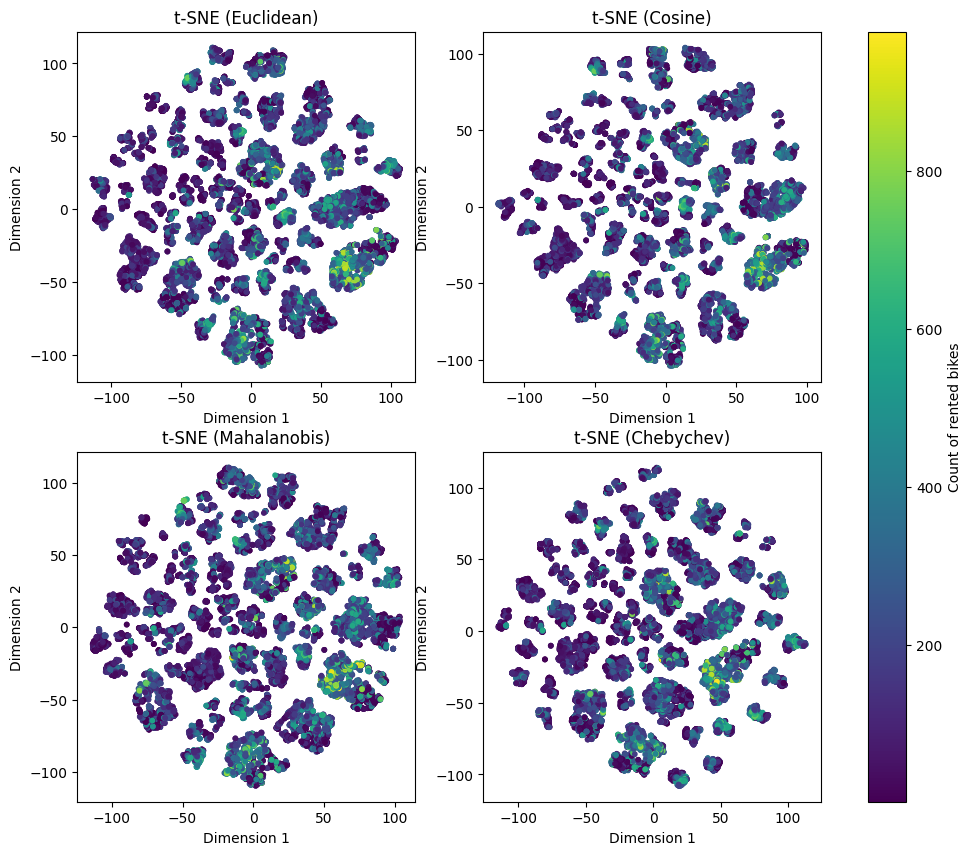

t-SNE on Bike rental datasets with different metrics - euclidean, cosine, mahalanobis, chebychev


In [102]:
# t-SNE
n_components = 2

tsne_ec = TSNE(n_components=n_components, perplexity=30, random_state=42, metric='euclidean')
tsne_cos = TSNE(n_components=n_components, perplexity=30, random_state=42, metric='cosine')
tsne_mah = TSNE(n_components=n_components, perplexity=30, random_state=42, metric='mahalanobis')
tsne_che = TSNE(n_components=n_components, perplexity=30, random_state=42, metric='chebyshev')
X_ec = tsne_ec.fit_transform(X_scaled)
X_cos = tsne_cos.fit_transform(X_scaled)
X_mah = tsne_mah.fit_transform(X_scaled)
X_che = tsne_che.fit_transform(X_scaled)

evaluate_model(X_ec, y, "t-SNE (Euclidean)")
evaluate_model(X_cos, y, "t-SNE (Cosine)")
evaluate_model(X_mah, y, "t-SNE (Mahalanobis)")
evaluate_model(X_che, y, "t-SNE (Chebychev)")

# Plot t-SNE results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(X_ec[:,0], X_ec[:,1], c=y, cmap='viridis', s=10)
axs[0, 0].set_title('t-SNE (Euclidean)')
axs[0, 1].scatter(X_cos[:,0], X_cos[:,1], c=y, cmap='viridis', s=10)
axs[0, 1].set_title('t-SNE (Cosine)')
axs[1, 0].scatter(X_mah[:,0], X_mah[:,1], c=y, cmap='viridis', s=10)
axs[1, 0].set_title('t-SNE (Mahalanobis)')
axs[1, 1].scatter(X_che[:,0], X_che[:,1], c=y, cmap='viridis', s=10)
axs[1, 1].set_title('t-SNE (Chebychev)')

for ax in axs.flat:
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

plt.colorbar(axs[1, 1].collections[0], ax=axs, orientation='vertical', label='Count of rented bikes')
plt.show()
print('t-SNE on Bike rental datasets with different metrics - euclidean, cosine, mahalanobis, chebychev')


When only 2 components are considered, t-SNE explains a better portion of the variance in the dataset using any of the metrics inserted (0.56 < R<sup>2</sup> < 0.6, huge improvement with respect to PCA using same number of components). The best part is t-SNE divides the X samples into well defined and easily separable clusters, more informative than just the two PCs in PCA.

The main limitation for using this approach is that is computationally harder and takes a lot of time to compute (all t-SNEs in 10-12 minutes with respect to PCA only taking 20 seconds). This is because time of computation increases sharply with the dataset samples size.

## References
Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.